![Htl Leonding](https://www.htl-leonding.at/wp-content/uploads/2018/12/htllogo.png?x29362)

# Tag der Offen Tür

# KIDS Künstliche Intelligenz & Data Science

# Project Cars

### Goals
- Playing with real data ,make sense out it, find correlations between values.
- Using specicif features of the libraries studied in class to strengthen the knowledge

### Dataset
- https://www.kaggle.com/atechnohazard/battery-and-heating-data-in-real-driving-cycles?select=TripA01.csv

### Problems
- The shear size of the data set. Creating a full pairplot of all 48 columns takes more than 15 minutes, even with optimized rendering
- Understanding the Dataset the huge amount of data was enourmous to wrap our heads arround
____
<!--  -->

In [3]:
#All libraries that are uses somewhere
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import time
import math
from IPython.display import display, HTML
import numpy as np
import ipywidgets as widgets


In [4]:
trip = pd.read_csv('./TripB01.csv') # Get First Trip
trip = trip[trip['Time [s]'] % 1 == 0] # Get only every 10th row (1s,2s,3s,4s,5s....)
trip 

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temp,...,Temp Footweel Driver,Temp Footweel Co-Driver,Temp Feetvent Co-Driver,Temp Feetvent Driver,Temp Head Co-Driver,Temp Head Driver,Temp Vent right,Temp Vent central right,Temp Vent central left,Temp Vent right
0,0.0,0.00000,449.00000,0.0,0.00000,-0.32930,0.0,388.80000,-19.06128,7.0,...,9.30159,8.42878,7.73053,8.07965,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
10,1.0,0.00000,449.00000,0.0,0.00000,-0.42098,0.0,388.80000,-18.21941,7.0,...,9.30159,8.49573,7.99832,8.37524,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
20,2.0,0.00000,449.00000,0.0,0.00000,-0.35800,0.0,388.90000,-17.74028,7.0,...,9.30159,8.71690,8.41439,8.79826,12.53101,13.34336,10.26169,9.71767,9.65072,10.34897
30,3.0,0.00000,449.00000,0.0,0.00000,-0.34662,0.0,388.95974,-17.27922,7.0,...,9.30159,8.91179,8.91773,9.53025,12.53101,13.31655,10.26169,9.67106,9.58376,10.27508
40,4.0,0.00000,449.00000,0.0,0.00000,-0.35230,0.0,388.95976,-17.07927,7.0,...,9.37547,9.22024,9.64223,10.38966,12.45714,13.31655,10.26169,9.65072,9.56344,10.26169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32470,3247.0,0.57881,476.00966,0.0,4.35177,0.21247,0.0,373.54784,-3.63922,15.0,...,24.13947,24.86533,38.10452,36.27161,22.51915,22.15101,29.78516,27.63073,29.11452,28.22271
32480,3248.0,0.09375,476.00000,0.0,0.00000,-0.28795,0.0,373.60000,-3.58716,15.0,...,24.13947,24.83772,38.10452,36.27161,22.48112,22.13199,29.81277,27.69040,29.11452,28.17342
32490,3249.0,0.00000,476.00000,0.0,0.00000,-0.34132,0.0,373.60000,-3.86484,15.0,...,24.07120,24.83772,38.10452,36.27161,22.41285,22.13199,29.81277,27.71801,29.05483,28.22270
32500,3250.0,0.00000,476.00000,0.0,0.00000,-0.36000,0.0,373.60000,-3.20841,15.0,...,24.05219,24.83772,38.10452,36.27161,22.39384,22.13199,29.75311,27.71801,29.08692,28.17342


In [5]:
def getTrip(n,m,x,y):
    return trip.iloc[n:m,x:y]

def smallTrip(n):
    return getTrip(0+n,100+n,0,48)
    

In [6]:
trip.isnull().sum()

Time [s]                          0
Velocity [km/h]                   0
Elevation [m]                     0
Throttle [%]                      0
Motor Torque [Nm]                 0
 Acceleration [m/s^2]             0
Regenerative Braking Signal       0
Battery Voltage [V]               0
Battery Current [A]               0
Battery Temp                      0
max. Battery Temp                 0
SoC                               0
displayed SoC [%]                 0
min. SoC [%]                      0
max. SoC [%)                      0
Heating Power CAN [kW]            0
Heating Power LIN [W]             0
Requested Heating Power [W]       0
AirCon Power [kW]                 0
Heater Signal                     0
Heater Voltage [V]                0
Heater Current [A]                0
Ambient Temp                      0
Ambient Temp Sensor               0
Coolant Temp Heatercore           0
Requested Coolant Temp            0
Coolant Temp Inlet                0
Coolant Volume Flow +500 [l/

In [7]:
# Function to create an image
# @param1 string -> name of the image
# @param2 sns_plot -> the plot to render
# @return The renderd image


def makeImage(name,plot):
    path='./savedImages/'+name+".png"
    
    # save the image and stop the rendering time
    start = time.time() 
    saveImage(path,plot)
    end = time.time()
    
    print("Render Time :"+str(math.ceil((end - start)*100)/100)+"s")
    print("FilePath: "+path)
    
    return Image(path) # The rendered image

def saveImage(path,plot):
    plot.savefig(path)
    plt.clf()

# Some blocks will be so big that they will have a scrollbar, I dont like the scrollbar
def clear():
    js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
    display(HTML(js))

# make the plots look better
sns.set_style("darkgrid")

Render Time :2.13s
FilePath: ./savedImages/MassPlot.png


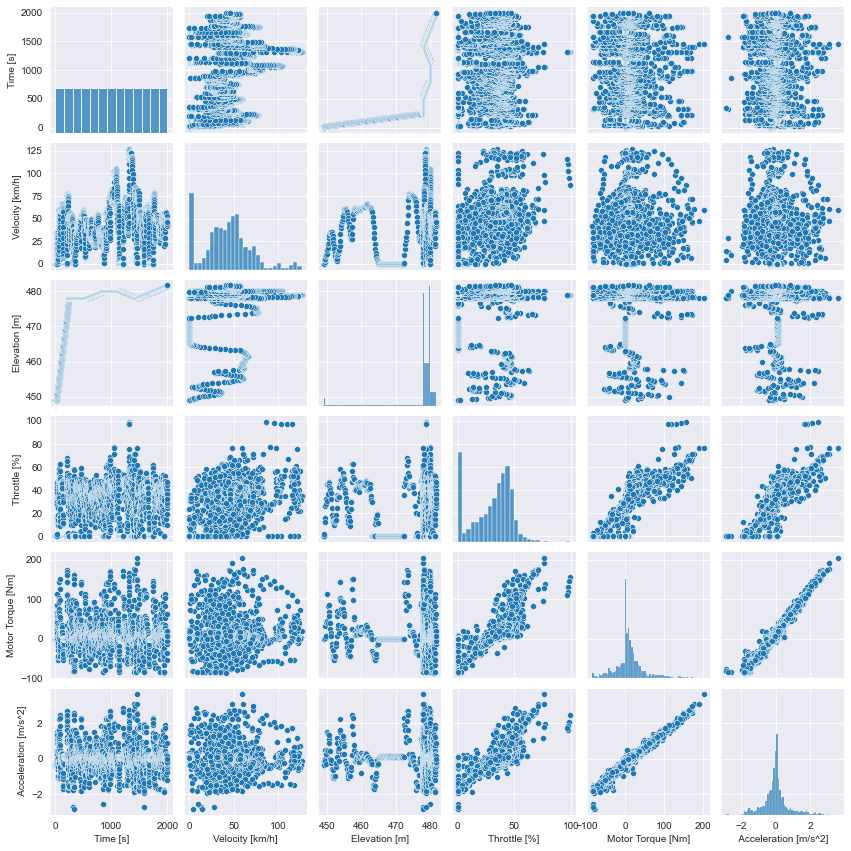

<Figure size 864x864 with 0 Axes>

In [8]:
plot = sns.pairplot(getTrip(0,2000,0,6), height=2.0)
makeImage("MassPlot",plot) # Show pairplot as image

<AxesSubplot:>

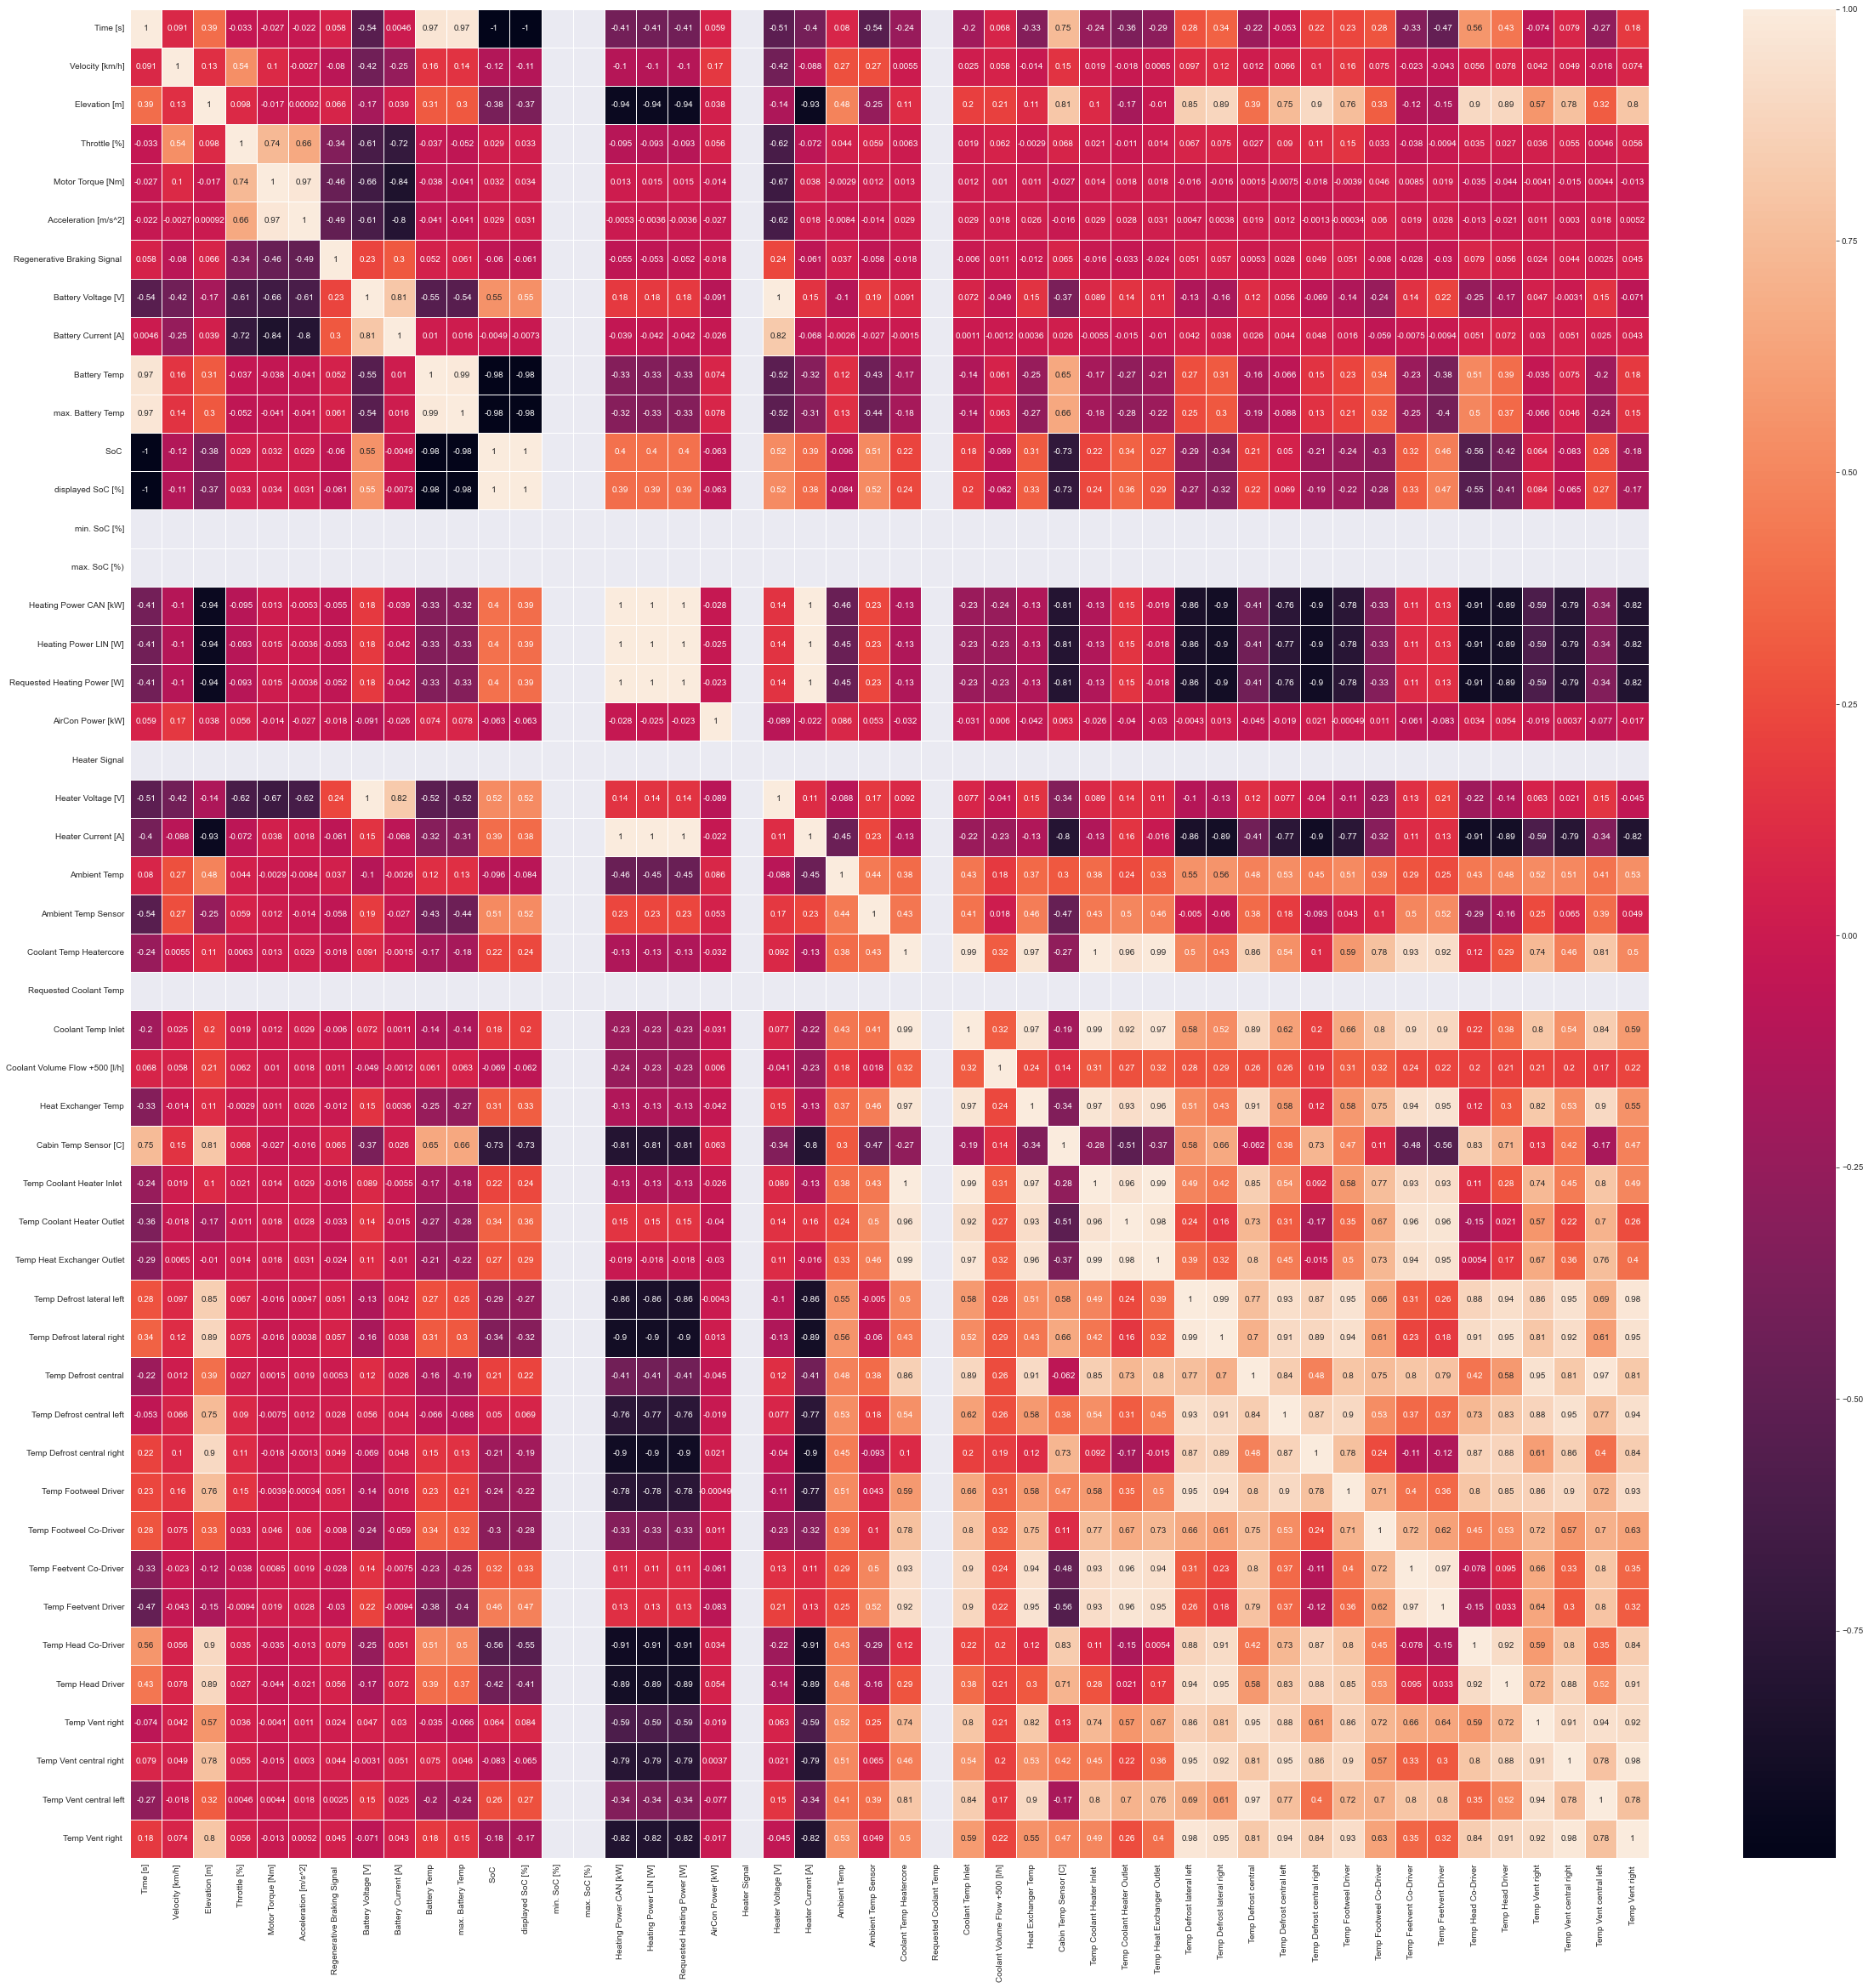

In [9]:
fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(trip.corr(), annot=True, linewidths=.5, ax=ax)

____
<!--  -->
# Conclusion of the Plots

We see that we don't see a lot of clear structure/correlation within our dataset.
The next logical thing is to to think about correlations and test them out ourself.

- Time - Battery Heat 1:1
- Battery Voltage - Battery Current -1:1
- Heat of all wheels 1:1



Render Time :0.42s
FilePath: ./savedImages/TimeBatteryHeatPlot.png


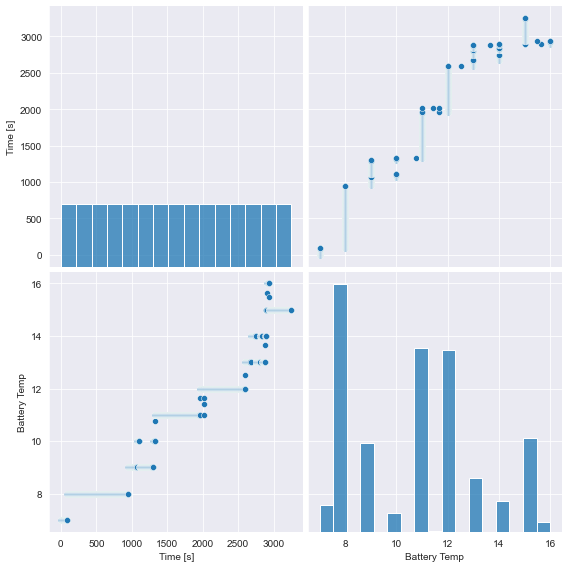

<Figure size 576x576 with 0 Axes>

In [10]:
# Time - Battery Heat

plot = sns.pairplot(trip[['Time [s]', 'Battery Temp']], height=4.0)
makeImage("TimeBatteryHeatPlot",plot) # Show pairplot as image

# Yes there is a correlation between Time and  Battery heat


Render Time :0.42s
FilePath: ./savedImages/BatteryVoltageCurrentPlot.png


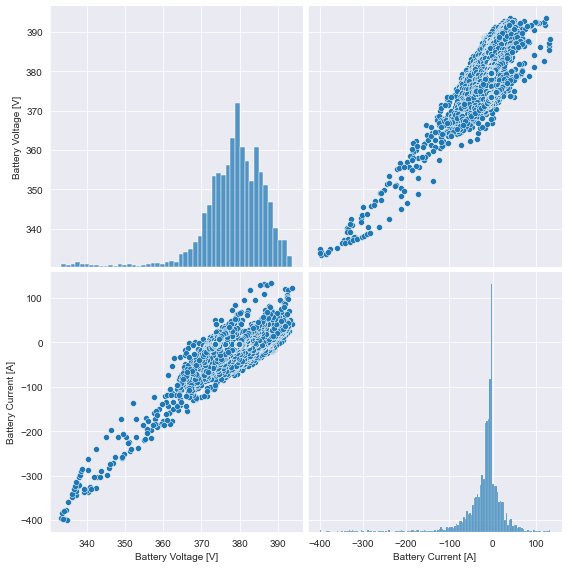

<Figure size 576x576 with 0 Axes>

In [11]:
#Battery Voltage - Battery Current

bv="Battery Voltage [V]"
bc="Battery Current [A]"

plot = sns.pairplot(trip[[bv,bc]], height=4.0)
makeImage("BatteryVoltageCurrentPlot",plot) # Show pairplot as image

# Yes there is a correlation between Time and  Battery heat


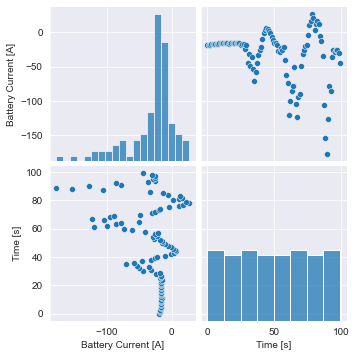

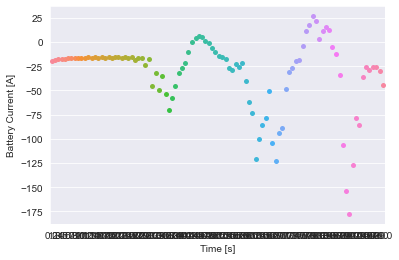

<Figure size 432x288 with 0 Axes>

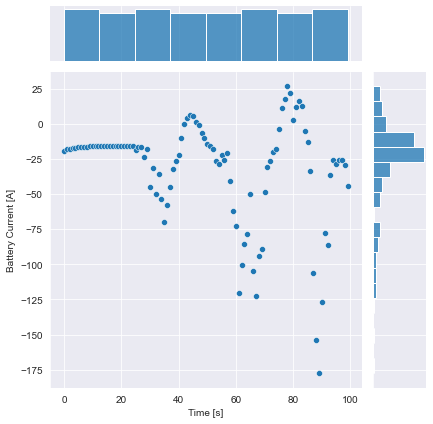

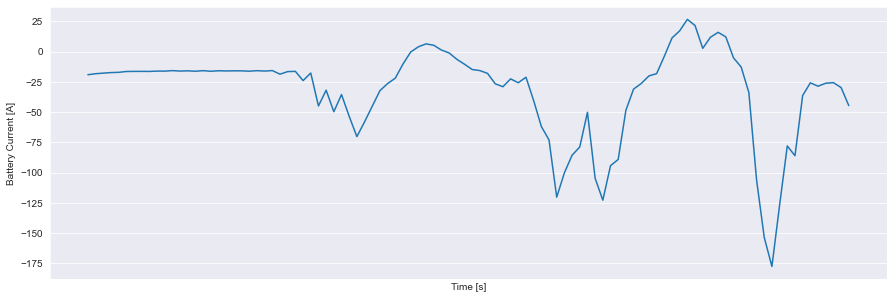

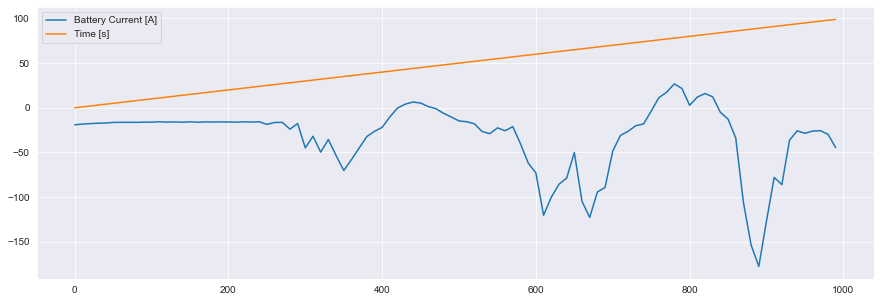

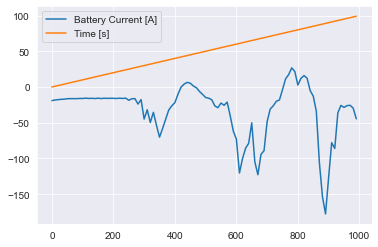

In [12]:
bv="Time [s]"
bc="Battery Current [A]"

def overview(plot,xVal,yVal):
    sns.pairplot(data=plot)
    plt.figure()
    sns.stripplot(data=plot, x=xVal, y=yVal)
    plt.figure()
    sns.jointplot(data=plot, x=xVal, y=yVal)
    plt.figure(figsize=(15,5))
    line_plot = sns.lineplot(data=plot, x=xVal, y=yVal,dashes=False)
    xticks = line_plot.get_xticks()
    line_plot.set_xticks(xticks[::40]);
    plt.figure(figsize=(15,5))
    sns.lineplot(data=plot, dashes=False)
    plt.figure()
    sns.lineplot(data=plot, dashes=False)

overview(smallTrip(0)[[bc,bv]],bv,bc)



In [13]:
clear()

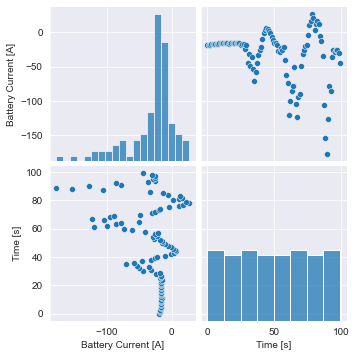

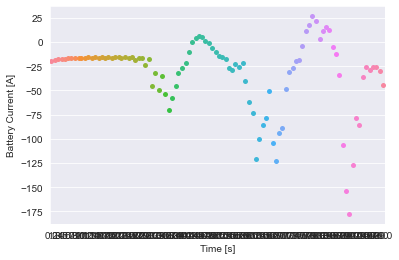

<Figure size 432x288 with 0 Axes>

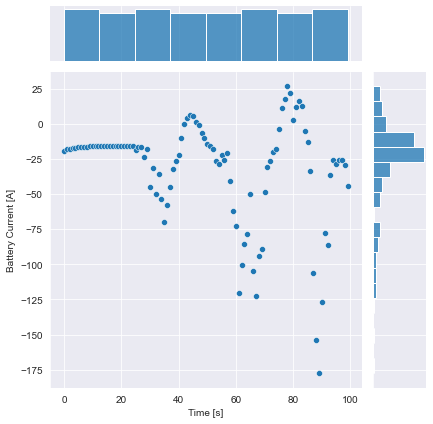

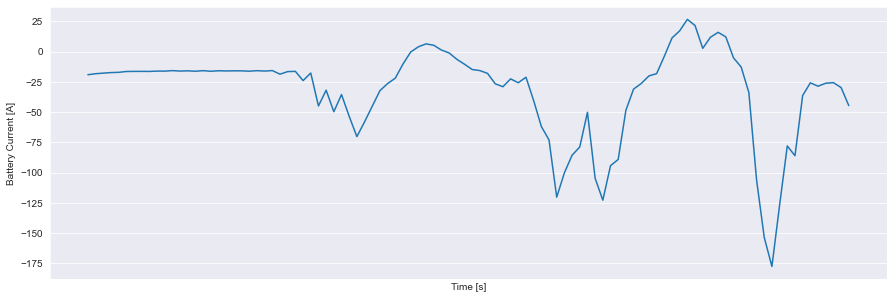

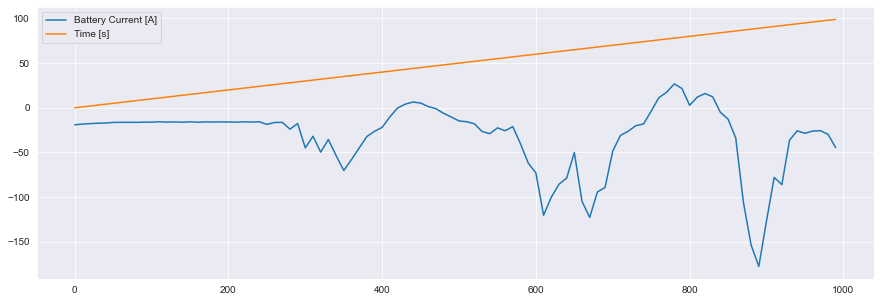

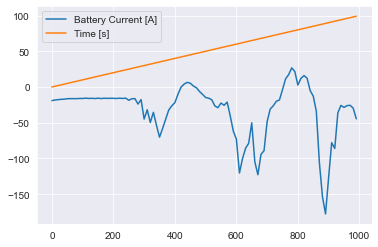

In [14]:
bv="Time [s]"
bc="Battery Current [A]"

overview(smallTrip(0)[[bc,bv]],bv,bc)

____
<!--  -->

## Using even More data

From now on, its even more important to think before run any code  
the dataset contains now 193,350 rows but we reduced it down to 1 10th,
but it still stores more than 9.4 million values (19335 rows × 49 columns)  


# How is the new data structured ?

First of all the headers do not include the units anymore for example from now on the
time coloumn is called 'Time' and not 'Time [s]' anmore

To differntiate the specific trips from each other they all of now a tripId (the last coloumn), 
we can NOT use it as an Id since there are 19 thousand rows and just 8 trips.

Each row has an own id created by the dataset

In [15]:

frames = []
for x in range(2,10):
    newTrip = pd.read_csv('./data/TripB0'+str(x)+'.csv') #read csv
    newTrip = newTrip[newTrip['Time'] % 1 == 0] # Get only every 10th row (1s,2s,3s,4s,5s....)
    newTrip["tripId"]=(x-1)
    frames.append(newTrip)
    
bigTrip = pd.concat(frames) # join all dataframes together
bigTrip


,Time,Velocity,Elevation,Throttle,Motor Torque,Longitudinal Acceleration,Regenerative Braking Signal,Battery Voltage,Battery Current,Battery Temperature,...,Temperature Footweel Co-Driver,Temperature Feetvent Co-Driver,Temperature Feetvent Driver,Temperature Head Co-Driver,Temperature Head Driver,Temperature Vent right,Temperature Vent central right,Temperature Vent central left,Temperature Vent right.1,tripId
0,0.0,0.0,437.0,0.0,0.0,-0.34,0.0,389.9,-1.60,13.0,...,9.91,12.44,10.17,11.31,11.40,12.01,11.13,11.48,10.87,1
10,1.0,0.0,437.0,0.0,0.0,-0.30,0.0,389.9,-1.54,13.0,...,9.88,12.44,10.21,11.27,11.52,12.01,11.17,11.48,10.83,1
20,2.0,0.0,437.0,0.0,0.0,-0.34,0.0,389.9,-1.54,13.0,...,9.83,12.48,10.30,11.22,11.74,11.97,11.22,11.48,10.75,1
30,3.0,0.0,437.0,0.0,0.0,-0.31,0.0,389.9,-1.44,13.0,...,9.79,12.56,10.31,11.22,11.79,11.92,11.19,11.48,10.66,1
40,4.0,0.0,437.0,0.0,0.0,-0.33,0.0,389.9,-1.46,13.0,...,9.70,12.65,10.22,11.26,11.71,11.92,11.13,11.48,10.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,5606.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,25.89,39.33,37.93,21.70,22.66,32.87,32.43,33.04,30.95,8
56070,5607.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,25.89,39.40,38.02,21.70,22.74,32.87,32.43,32.96,30.95,8
56080,5608.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,25.42,39.10,37.67,21.78,22.66,32.56,32.35,32.80,30.95,8
56090,5609.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,24.58,36.57,35.35,21.70,22.48,32.28,32.34,32.62,30.86,8


In [16]:
bigTrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19335 entries, 0 to 56100
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Time                               19335 non-null  float64
 1   Velocity                           19335 non-null  float64
 2   Elevation                          19335 non-null  float64
 3   Throttle                           19335 non-null  float64
 4   Motor Torque                       19335 non-null  float64
 5   Longitudinal Acceleration          19335 non-null  float64
 6   Regenerative Braking Signal        19335 non-null  float64
 7   Battery Voltage                    19335 non-null  float64
 8   Battery Current                    19335 non-null  float64
 9   Battery Temperature                19335 non-null  float64
 10  max. Battery Temperature           19335 non-null  float64
 11  SoC                                16863 non-null  flo

Hier kann man nun sehen dass wir auch einige (Tausende) Nullfelder haben dies wird sich auf die Qualität der nächsten Plots auswirken jedoch gehe ich nicht davon aus das die Qualität sehr stark darunter leiden wird da es sich um ungefähr 1-2% null felder handelt

____
<!--  -->
# Time - Acceleration  Correlation 

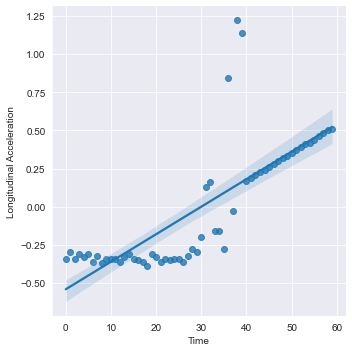

In [17]:
 
sns.lmplot(x='Time', y='Longitudinal Acceleration', data=bigTrip[0:60])

Hier können wir sehen, dass wie davon schon auszugehen war die Beschleunigung innerhalb der ersten Minute nach Start eines Trips immer größer wird, wenn wir diesen Graphen nun von 60 Sekunden auf eine Stunde Zeichnen lassen würden ,wäre unser Ergebnis vermutlich um einiges verstreuter, weil während eines Trips auch gebremst werden muss (Stau, Ampel, Personen auf der Fahrbahn)

Und genau dass schauen wir uns jetzt an

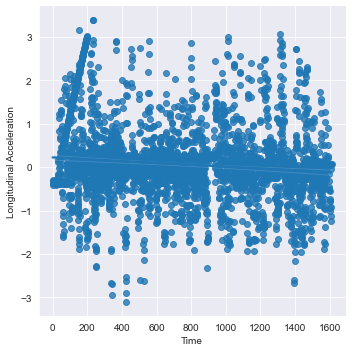

<Figure size 432x288 with 0 Axes>

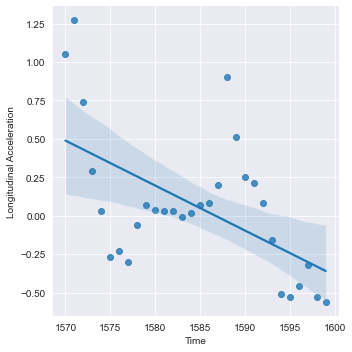

In [18]:
sns.lmplot(x='Time', y='Longitudinal Acceleration', data=bigTrip[0:3600])
plt.figure()
sns.lmplot(x='Time', y='Longitudinal Acceleration', data=bigTrip[1570:1600])

Wie schon erwähnt ist dieser Graph sehr verstreut, trotzdem kann man  auch in diesem Graphen erkennen das die Beschleunigung zu Begin der Fahrt eher größer wird als zum Ende hin

![Drag Racing](./savedImages/proof1.png)
 
Der zweite Graph zeit die letzen 30 Sekunden der Trips die Beschleunigung nimmt stark ab.


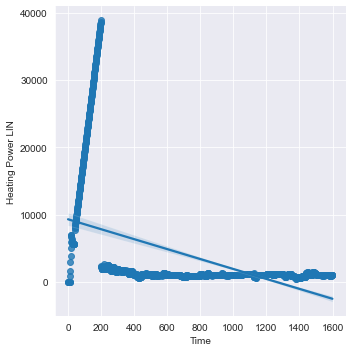

In [19]:
sns.lmplot(x='Time', y='Heating Power LIN', data=bigTrip[0:1600])

### Beobachtung

In diesen Graph kann man sehr gut erkennen, dass die benötigte Energie zum heizen in den ersten 160 Sekungen immer höher wird und dann ab ungefähr 200 Sekunden starb abnimmt und fortan gleich bleibt.

### Mögliche Erklräung
Dies liegt vermutlich daran ,dass die Heizung eines Autos normalerweise über die Wärme des Motors reguliert wird, zu begin der Fahrt ist der Motor normalerweise nicht recht warm/heiß weswegen eine zusätzliche Heizung sprich die zuheizung eingschaltet werden muss, diese verbraucht enorm viel energie was sich im Graphen auch erkenntlich zeigt.

____
<!--  -->
# Wheel Temperature during a Trip

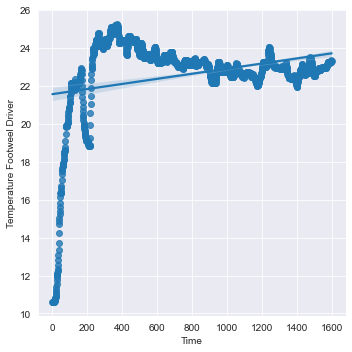

In [20]:
sns.lmplot(x='Time', y='Temperature Footweel Driver', data=bigTrip[0:1600])

### Beobachtung

Die Reifen Temperatur steigt in den ersten 3 Minuten stark an. 
Danach schwankt die Temperatur mit einer trotzdem steingenden Tendez.

Da die durchscnittliche Start Reifentemperatur bei ~10.2 Grad Celsisus liegt, können wir eventuell davon ausgehen das die Messungen eher im Winter durchgeführt wurden.


### Mögliche Erklärung

Durch Reibung ensteht Wärme aufgrund von Thermodynamik.
Die Schwankungen können eventuell auf Rote Ampeln, andere Straßen verhältnisse oder auf Stau's zurückgeführt werden

____
<!--  -->
# Coolant Temperature during a Trip

<AxesSubplot:xlabel='Time', ylabel='Temperature Coolant Heater Outlet'>

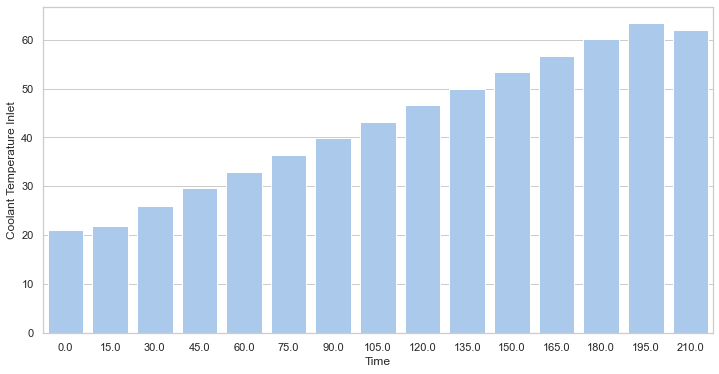

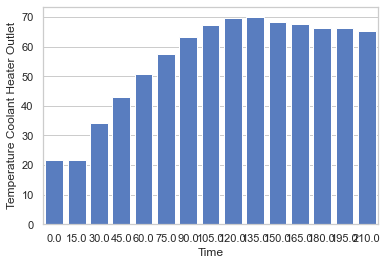

In [21]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Only calculate the sample once
data=bigTrip[bigTrip['Time'] % 15 == 0 ][0:15]

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Time", y="Coolant Temperature Inlet", data=data,
            label="Total", color="b")

plt.figure()

sns.set_color_codes("muted")
sns.barplot(x="Time", y="Temperature Coolant Heater Outlet", data=data,
             label="Alcohol-involved", color="b")


### Datensatz

Für diese Graphen wurden nur 15 Datensätze genommen um einen Möglichst "schönen" Graphen
zu erhalten. Um Trotzdem eine großen Datenbereich abzudecken wurden Datensätze mit "großen"
Zeitlichen Abstand genommen, sprich ein Datensatz alle 15 Sekunden was sich in diesen Fall auf
die ersten 3 1/2 Minunten nach dem Start eines Trips.

Das nutzen von Datensätzen von späteren Zeitpunkte würde vermutlich weniger Sinn ergeben, weil
das Kühlmittel die maximal Temperatur* erreicht und dann nur noch schwache veränderungen zeigt.

*die Temperatur die das Kühlmittel Maximal aufgrund der Motorwärme m in einem Abstand zum Motor n erreichen kann

### Beobachtung

Die Kühlmittelflüssigkeit wird im Laufe der Zeit immer Wärmer.

![Drag Racing](./savedImages/coolant.jpg)




### Mögliche Erklärung

Eine Erklärung dafür, dass die Eingangstemperatur niedrieger ist als die Ausgangtemperatur.
Zu beginn muss man erwähnen dass die Flüssigkeit zu jeder Zeit im system ist, sprich es handelt sich
hier nicht um das gleiche Prinzip wie bei einem Wärmetauscher.

Ich denke, dass die nähe zum Motor die bei der Seite des Ausgangs näher ist spielt hier eine wessentliche Rolle.
Der Motor strahlt innerhalb des gesamten Motorraumes wärme aus und diese flacht mit der distanz ab.

##### Die obigen Sätze als Bild zusammengefasst :
![Coolant](./savedImages/coolantSolution.png)

# Data Training Regression
[Von Karpfen empfohlenes Tutorial für dieses Thema](https://www.kaggle.com/learn/time-series)   
Nimm das daten set was dir besser gefällt

In [22]:
bigTrip # 9 trips in one

,Time,Velocity,Elevation,Throttle,Motor Torque,Longitudinal Acceleration,Regenerative Braking Signal,Battery Voltage,Battery Current,Battery Temperature,...,Temperature Footweel Co-Driver,Temperature Feetvent Co-Driver,Temperature Feetvent Driver,Temperature Head Co-Driver,Temperature Head Driver,Temperature Vent right,Temperature Vent central right,Temperature Vent central left,Temperature Vent right.1,tripId
0,0.0,0.0,437.0,0.0,0.0,-0.34,0.0,389.9,-1.60,13.0,...,9.91,12.44,10.17,11.31,11.40,12.01,11.13,11.48,10.87,1
10,1.0,0.0,437.0,0.0,0.0,-0.30,0.0,389.9,-1.54,13.0,...,9.88,12.44,10.21,11.27,11.52,12.01,11.17,11.48,10.83,1
20,2.0,0.0,437.0,0.0,0.0,-0.34,0.0,389.9,-1.54,13.0,...,9.83,12.48,10.30,11.22,11.74,11.97,11.22,11.48,10.75,1
30,3.0,0.0,437.0,0.0,0.0,-0.31,0.0,389.9,-1.44,13.0,...,9.79,12.56,10.31,11.22,11.79,11.92,11.19,11.48,10.66,1
40,4.0,0.0,437.0,0.0,0.0,-0.33,0.0,389.9,-1.46,13.0,...,9.70,12.65,10.22,11.26,11.71,11.92,11.13,11.48,10.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,5606.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,25.89,39.33,37.93,21.70,22.66,32.87,32.43,33.04,30.95,8
56070,5607.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,25.89,39.40,38.02,21.70,22.74,32.87,32.43,32.96,30.95,8
56080,5608.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,25.42,39.10,37.67,21.78,22.66,32.56,32.35,32.80,30.95,8
56090,5609.0,0.0,654.0,0.0,0.0,-0.21,0.0,389.2,92.90,14.0,...,24.58,36.57,35.35,21.70,22.48,32.28,32.34,32.62,30.86,8


In [23]:
trip # a single trip


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temp,...,Temp Footweel Driver,Temp Footweel Co-Driver,Temp Feetvent Co-Driver,Temp Feetvent Driver,Temp Head Co-Driver,Temp Head Driver,Temp Vent right,Temp Vent central right,Temp Vent central left,Temp Vent right
0,0.0,0.00000,449.00000,0.0,0.00000,-0.32930,0.0,388.80000,-19.06128,7.0,...,9.30159,8.42878,7.73053,8.07965,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
10,1.0,0.00000,449.00000,0.0,0.00000,-0.42098,0.0,388.80000,-18.21941,7.0,...,9.30159,8.49573,7.99832,8.37524,12.53101,13.49111,10.26169,9.65072,9.65072,10.34897
20,2.0,0.00000,449.00000,0.0,0.00000,-0.35800,0.0,388.90000,-17.74028,7.0,...,9.30159,8.71690,8.41439,8.79826,12.53101,13.34336,10.26169,9.71767,9.65072,10.34897
30,3.0,0.00000,449.00000,0.0,0.00000,-0.34662,0.0,388.95974,-17.27922,7.0,...,9.30159,8.91179,8.91773,9.53025,12.53101,13.31655,10.26169,9.67106,9.58376,10.27508
40,4.0,0.00000,449.00000,0.0,0.00000,-0.35230,0.0,388.95976,-17.07927,7.0,...,9.37547,9.22024,9.64223,10.38966,12.45714,13.31655,10.26169,9.65072,9.56344,10.26169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32470,3247.0,0.57881,476.00966,0.0,4.35177,0.21247,0.0,373.54784,-3.63922,15.0,...,24.13947,24.86533,38.10452,36.27161,22.51915,22.15101,29.78516,27.63073,29.11452,28.22271
32480,3248.0,0.09375,476.00000,0.0,0.00000,-0.28795,0.0,373.60000,-3.58716,15.0,...,24.13947,24.83772,38.10452,36.27161,22.48112,22.13199,29.81277,27.69040,29.11452,28.17342
32490,3249.0,0.00000,476.00000,0.0,0.00000,-0.34132,0.0,373.60000,-3.86484,15.0,...,24.07120,24.83772,38.10452,36.27161,22.41285,22.13199,29.81277,27.71801,29.05483,28.22270
32500,3250.0,0.00000,476.00000,0.0,0.00000,-0.36000,0.0,373.60000,-3.20841,15.0,...,24.05219,24.83772,38.10452,36.27161,22.39384,22.13199,29.75311,27.71801,29.08692,28.17342


In [24]:
# Predictions

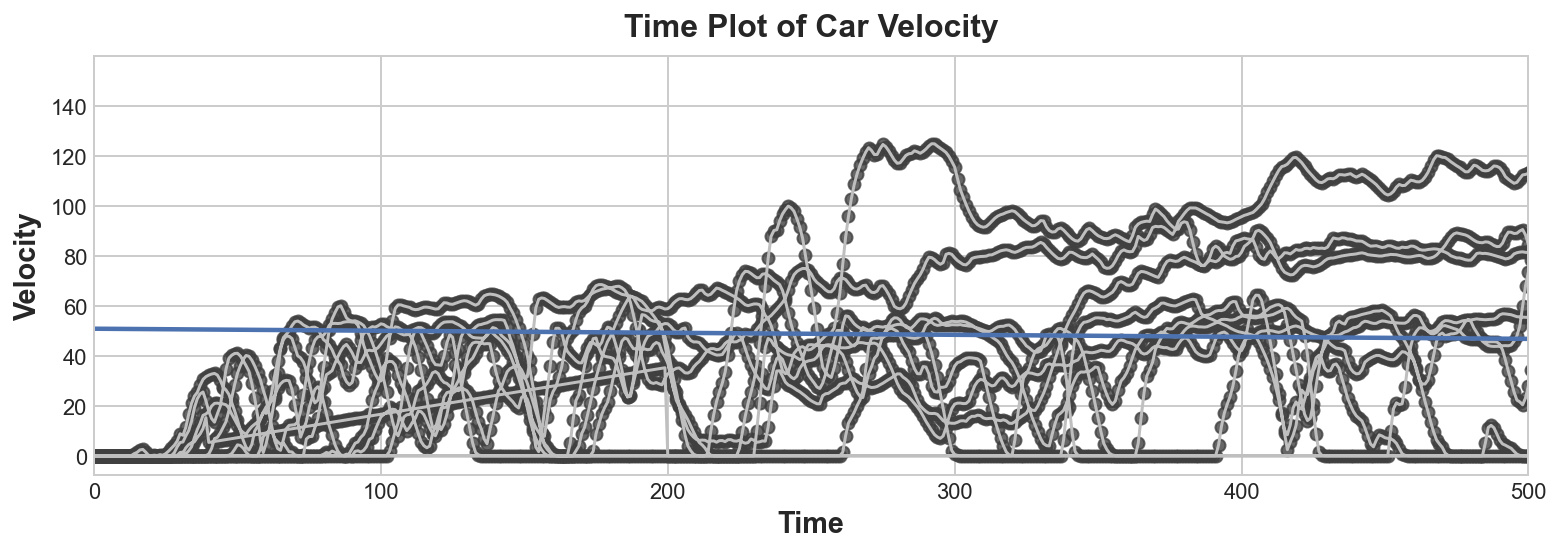

In [25]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
plt.xlim([0, 500])
ax.plot('Time', 'Velocity', data=bigTrip, color='0.75')
ax = sns.regplot(x='Time', y='Velocity', data=bigTrip, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Car Velocity');

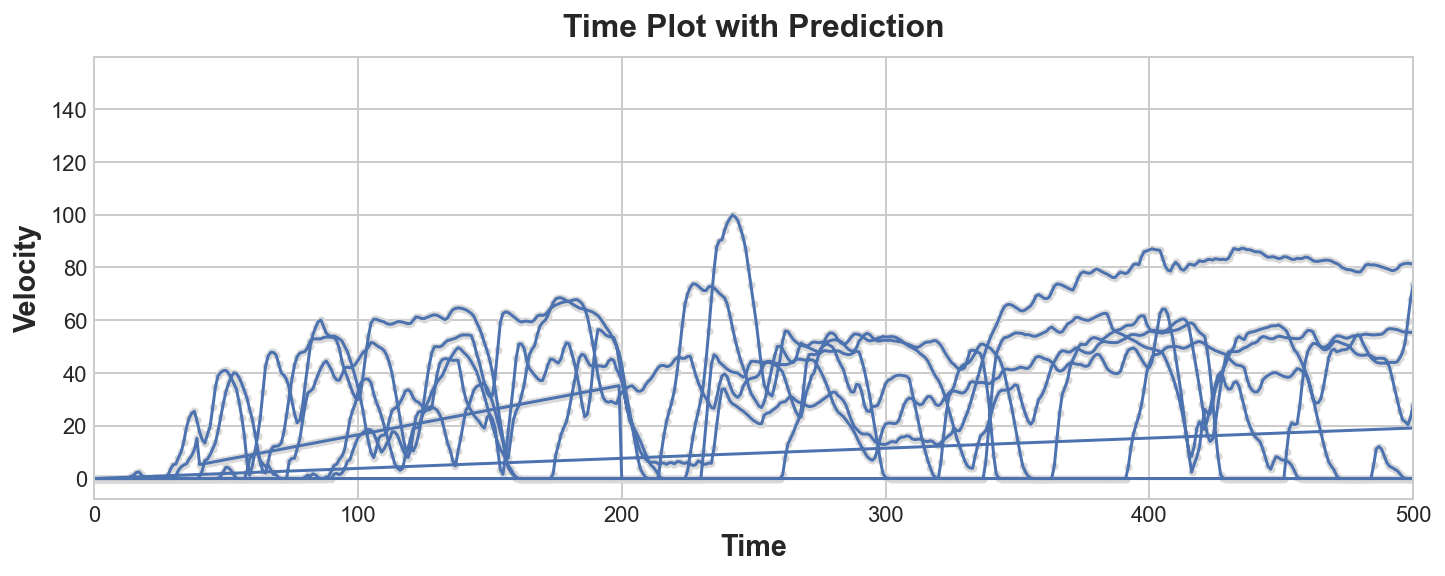

In [26]:
from sklearn.linear_model import LinearRegression

bTr = bigTrip.dropna()

X = bTr
y = bTr["Velocity"]

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

#ax = y.plot(**plot_params)
#ax = y_pred.plot()
fig, ax = plt.subplots()
plt.xlim([0,500])
ax.plot(X["Time"], y, '.', color='0.85')
ax.plot(X["Time"], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Velocity')
ax.set_xlabel('Time')
ax.set_title('Time Plot with Prediction');


C:\Users\Emil\.conda\envs\leoenv\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


TypeError: cannot do slice indexing on Int64Index with these indexers [Time] of type str

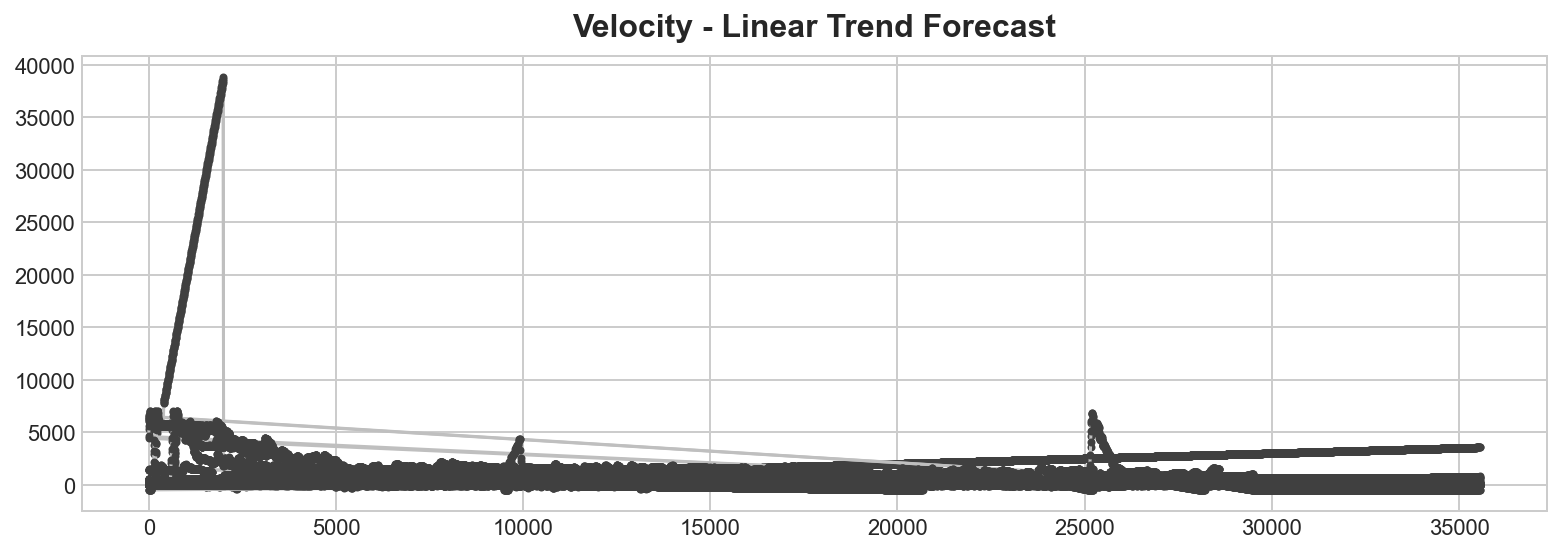

In [36]:
###                 ###
### TODO: Fix  this ###
###                 ###

from statsmodels.tsa.deterministic import DeterministicProcess

bTr = bigTrip.dropna()

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

dp = DeterministicProcess(
    index=bTr.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

X = dp.in_sample()

y = bTr["Velocity"]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

ax = bTr.plot(title="Velocity - Linear Trend Forecast", **plot_params)
ax = y_pred["Time":].plot(ax=ax, linewidth=3, label="Trent")
ax = y_fore["Time":].plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()


# Evaluation of the Model

In [27]:
# Just for saftey, big cells will have their scrollbars removed
# Otherwise big cells would not be able to viewed fully in a pdf
clear() # <-- custom functions


![Formular](./savedImages/FormularPart.png)

### Anmeldung bitte nur mit Original-Schulnachricht und ausgefülltem Anmeldebogen!

Sie haben folgende Möglichkeiten:

- Persönlich im Sekretariat vorbeibringen.
- Im Postkasten beim Eingang der HTL einwerfen. Bitte ein frankiertes Rückkuvert für das Originalzeugnis beilegen.
- Per Post an die HTL Leonding schicken. Bitte ein frankiertes Rückkuvert für das Originalzeugnis beilegen.  

**Anmeldezeitraum: 28.02.2022 – 11.03.2022**

[Zu den Formularen](https://www.htl-leonding.at/bewerber/formulare/)